# Week 6 - Exploratory Data Analysis and visualization

**Outline:**

* Matplotlib
    * Magic
* Seaborn
    * Get help
    * Pair plots
    * Categorical plots
    * Pivot tables
    * Heatmap
* Altair
    * Tidy data
    * Chart objects - Marks and Encoding
    * Aggregation
    * Compound Charts - Layering, HConcat and VConcat    
* Bonus -- Creating A Dashboard with Altair and Panel
    
## Overview

We worked pretty hard last week to get the data into a tabular form and start cleaning and engineering features. Let's enjoy the benefits of our labor this week to let Pandas do some heavy lifting for us with visualization. 

Up to this point, we have looked at data wrangling as an end unto itself, used simply to get the data into a better form or format before it gets used in some process. 

This week we will look at some visualization methods using the **matplotlib**, **seaborn**, and **altair** libraries.

***

_Full disclosure: Parts of this FTE were taken from MSDS 620, Week 7's FTE._

## Matplotlib

The most "universal" data plotting library in Python is called `matplotlib`. It is a **very** powerful library with a ton of options and abilities but like most powerful software, it can be a tad bit confusing to use. I recommend looking at some of DataCamp's tutorials about matplotlib and definitely get their [matplotlib cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

Just like we use **pd** as an alias for Pandas and **np** as an alias for Numpy, the accepted alias for matplotlib is **plt**. 

### Magic

Jupyter notebooks have special commands called "magic" that perform special functions. Some very useful magics:

* %time
* %timeit
* %matplotlib inline

The first two are concerned with timing lines of code or entire cells but the third magic is the one we are most interested in. `%matplotlib inline` tells the jupyter notebook to show graphs on the notebook page.

Let's make a quick scatter plot:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
# First, let's have 50 x-values
x = np.random.randint(low=0, high=1000,size=50)
x

array([564, 842, 842, 315, 387, 354, 110, 249, 702, 180,   0, 467, 613,
       375, 301, 156,  43, 389, 103, 775, 413, 938, 611, 966, 721, 237,
       158, 650, 242, 333,  55, 143, 251,  95, 235,  73, 603, 387, 895,
       932, 177,  97, 347, 301, 591, 146, 725, 384, 850, 706])

In [5]:
# Now, let's generate some y-values
y = 2 * x - 5 + np.random.randint(low=0, high=1000,size=50)
y

array([1893, 2452, 2364,  686, 1187, 1455,  898,  980, 1924, 1290,  304,
        984, 1768,  793, 1180,  510, 1036, 1454,  450, 2186, 1014, 2301,
       1947, 2180, 1611, 1173,  860, 1785, 1279,  872, 1004, 1054, 1238,
        566, 1362, 1056, 1863, 1063, 2084, 2271,  756,  556, 1317, 1455,
       2080,  698, 1551, 1620, 2641, 2051])

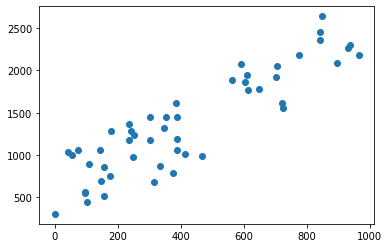

In [6]:
# And then a simple plot
plt.scatter(x,y);

That plot is OK but doesn't look that great, so let's bring in another plotting library -- just for formatting, now. We will do more with it in a bit.

In [7]:
import seaborn as sns
sns.set()               # Makes graphs prettier

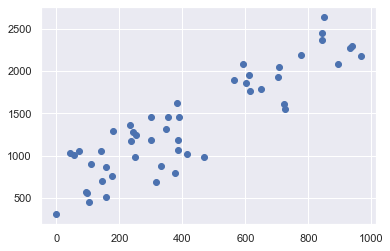

In [8]:
plt.scatter(x,y)

## Seaborn

The seaborn library is built on top of matplotlib and significantly simplifies creating more complex graphs. We will use seaborn to do some preliminary analysis on a "real" example data set in a few minutes. Just like `matplotlib` above, I encourage you to go get the [Datacamp Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

Seaborn is smart enough to get data out of a dataframe, provided you tell it which columns go on the axes. We will use the `zip()` function to create a list of tuples then make a dataframe.

In [9]:
import pandas as pd
data = list(zip(x,y))
df = pd.DataFrame(data,columns=['x','y'])
df.head()

,x,y
0,564,1893
1,842,2452
2,842,2364
3,315,686
4,387,1187


### Getting Help

Seaborn has a `scatterplot()` function and also a `relplot()` function that "relates" two variables. The `relplot()` default is to use a scatterplot.

To get help, enter a question mark ('?') and then the function in a blank code cell and execute it, like so:

In [10]:
?sns.relplot

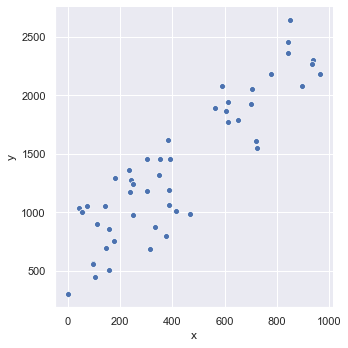

In [11]:
sns.relplot(x='x', y='y',data=df)

Let's demonstrate seaborn's ability to calculate and plot a linear regression. It will even throw in confidence intervals for free!

In [12]:
# Suppress a deprecation warning...

import warnings
warnings.filterwarnings('ignore')

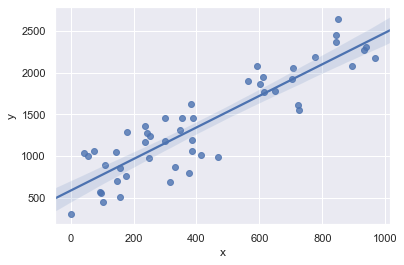

In [13]:
# Using our x and y from earlier.
# Seaborn has 2 ways to plot a regression: regplot and lmplot

sns.regplot(x="x", y="y", data=df);

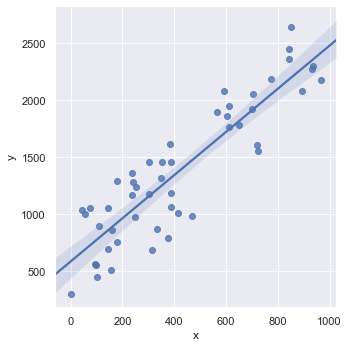

In [14]:
sns.lmplot(x="x", y="y", data=df);

As you can see, the plots are the same just a different shape.

Seaborn can even plot residuals for us:

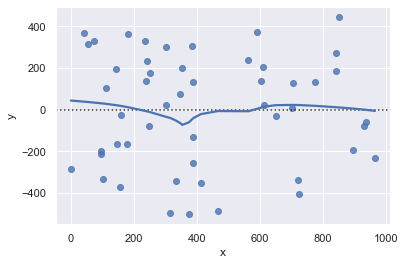

In [15]:
# lowess is a local regression line 
sns.residplot(x='x', y='y', lowess=True, data=df)

Points should be randomly distributed on the y-axis. If you see patterns then linear regression probably isn't appropriate.


Let's load some meaningful data to demonstrate some of Seaborn's more useful features. Let's use one of the sample datasets provided with Seaborn. What's that? You don't know what datasets are provided?  No problem. We'll ask Seaborn to give us a listiing!

In [16]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

***

Let's play with the 'mpg' dataset.  This is a study of 1970's cars from several different countries. 

In [17]:
mpg = sns.load_dataset('mpg')

In [18]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


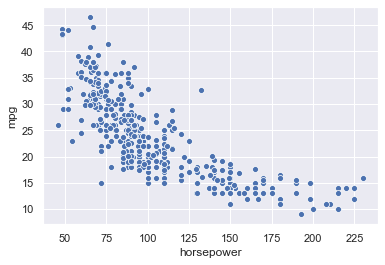

In [19]:
sns.scatterplot(x='horsepower', y='mpg', data=mpg)

Every Seaborn plot needs a minimum of 3 things: <br>
* The column to use for X, 
* The column to use for Y, 
* The name of the dataset

However, get in the habit of using the **hue** parameter. It will color the output (dots in this case) according to some third column:

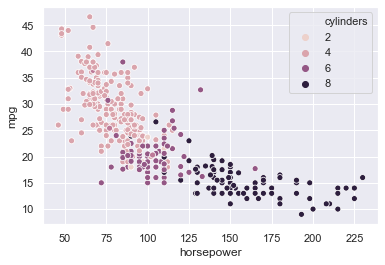

In [20]:
sns.scatterplot(x='horsepower', y='mpg', hue='cylinders',data=mpg)

If you want even more differentiation, you can set the **style** parameter to a fourth column:

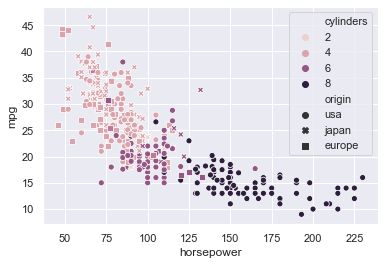

In [21]:
sns.scatterplot(x='horsepower', y='mpg', hue='cylinders',style='origin', data=mpg)

### Pair plots

Pair plots are useful for showing relationships between variables.

<div class="alert alert-warning">
  <strong>Warning!</strong> Be careful you don't compare too many variables at once! 
</div>

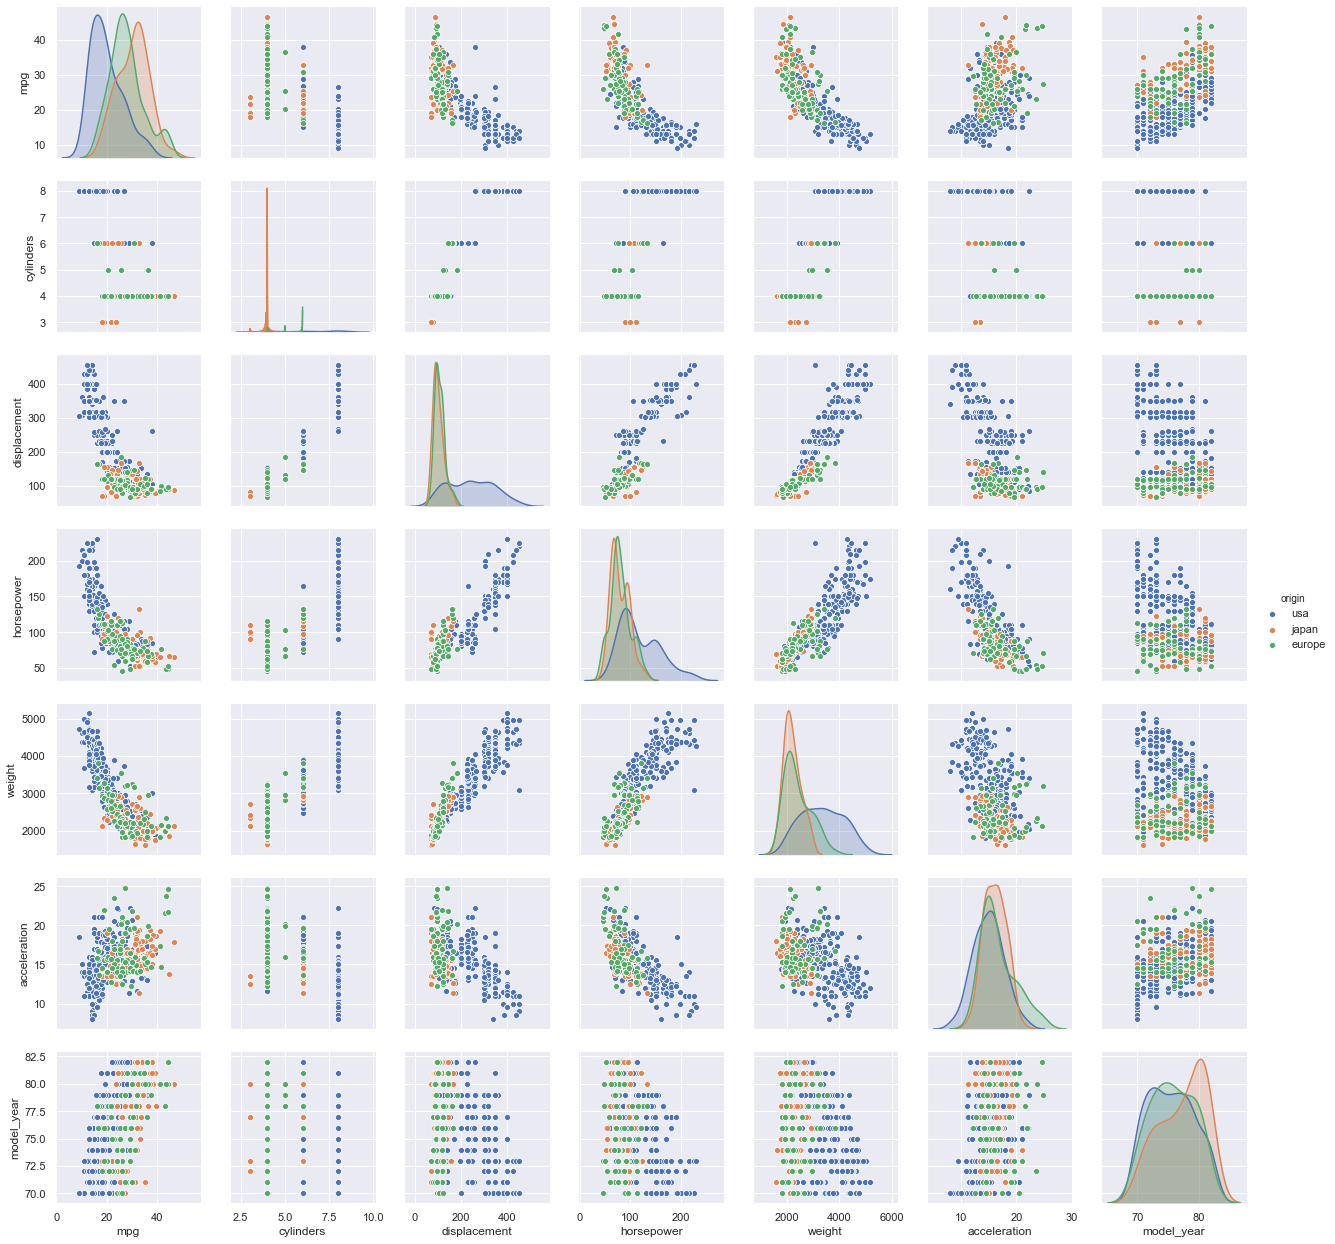

In [22]:
sns.pairplot(mpg, hue='origin')

### Categorical plots

From the Seaborn documentation:

>This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations.

In [23]:
sns.catplot?

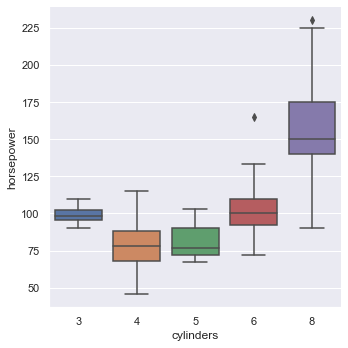

In [24]:
sns.catplot('cylinders', 'horsepower', data=mpg, kind='box')

### Pivot Tables and Heat Maps
The pivot_table() function of DataFrames help us focus on only the columns we want. Values can be grouped and aggregated.

In our MPG example, we pivot the dataframe so that the index is the model year and values in the columns shown are averages. 

***

Excellent Pandas pivot_table tutorial: https://pbpython.com/pandas-pivot-table-explained.html

In [25]:
mpg_p = mpg.pivot_table(index='model_year')
mpg_p.head()

,acceleration,cylinders,displacement,horsepower,mpg,weight
model_year,,,,,,
70,12.948276,6.758621,281.413793,147.827586,17.689655,3372.793103
71,15.142857,5.571429,209.750000,107.037037,21.250000,2995.428571
72,15.125000,5.821429,218.375000,120.178571,18.714286,3237.714286
73,14.312500,6.375000,256.875000,130.475000,17.100000,3419.025000
74,16.203704,5.259259,171.740741,94.230769,22.703704,2877.925926


Most of pivot_table's parameters can take multiple values in lists. For example, we can further segment model year by country. Specifying `values='mpg'` gives us the average mpg for that country in that year.

In [26]:
mpg_p = mpg.pivot_table(index=['model_year', 'origin'], values='mpg')
mpg_p.head(20)

mpg
model_year origin           
70         europe  25.200000
           japan   25.500000
           usa     15.272727
71         europe  28.750000
           japan   29.500000
           usa     18.100000
72         europe  22.000000
           japan   24.200000
           usa     16.277778
73         europe  24.000000
           japan   20.000000
           usa     15.034483
74         europe  27.000000
           japan   29.333333
           usa     18.333333
75         europe  24.500000
           japan   27.500000
           usa     17.550000
76         europe  24.250000
           japan   28.000000

Order matters in the list. Reversing 'origin' and 'model_year' changes the aggregation.

In [27]:
mpg_p = mpg.pivot_table(index=['origin', 'model_year'], values='mpg')
mpg_p.head(20)

mpg
origin model_year           
europe 70          25.200000
       71          28.750000
       72          22.000000
       73          24.000000
       74          27.000000
       75          24.500000
       76          24.250000
       77          29.250000
       78          24.950000
       79          30.450000
       80          37.288889
       81          31.575000
       82          40.000000
japan  70          25.500000
       71          29.500000
       72          24.200000
       73          20.000000
       74          29.333333
       75          27.500000
       76          28.000000

You can also specify one or more aggregation functions.

In [28]:
mpg_p = mpg.pivot_table(index=['origin', 'model_year'], values='mpg', aggfunc=[np.mean, min, max])
mpg_p.head(20)

mean   min   max
                         mpg   mpg   mpg
origin model_year                       
europe 70          25.200000  24.0  26.0
       71          28.750000  27.0  30.0
       72          22.000000  18.0  26.0
       73          24.000000  19.0  29.0
       74          27.000000  24.0  31.0
       75          24.500000  22.0  29.0
       76          24.250000  16.5  29.5
       77          29.250000  21.5  36.0
       78          24.950000  16.2  43.1
       79          30.450000  25.4  37.3
       80          37.288889  29.8  44.3
       81          31.575000  28.1  34.5
       82          40.000000  36.0  44.0
japan  70          25.500000  24.0  27.0
       71          29.500000  25.0  35.0
       72          24.200000  19.0  28.0
       73          20.000000  18.0  22.0
       74          29.333333  24.0  32.0
       75          27.500000  24.0  33.0
       76          28.000000  19.0  33.0

You can add columns to further refine the displayed information. 

In [27]:
mpg_p = mpg.pivot_table(index=['origin', 'model_year'], values='mpg', columns=['cylinders'], aggfunc=[np.mean, min, max])
mpg_p.head(20)

mean                              min                    \
cylinders             3          4     5     6   8     3     4     5     6   
origin model_year                                                            
europe 70           NaN  25.200000   NaN   NaN NaN   NaN  24.0   NaN   NaN   
       71           NaN  28.750000   NaN   NaN NaN   NaN  27.0   NaN   NaN   
       72           NaN  22.000000   NaN   NaN NaN   NaN  18.0   NaN   NaN   
       73           NaN  24.000000   NaN   NaN NaN   NaN  19.0   NaN   NaN   
       74           NaN  27.000000   NaN   NaN NaN   NaN  24.0   NaN   NaN   
       75           NaN  24.500000   NaN   NaN NaN   NaN  22.0   NaN   NaN   
       76           NaN  25.357143   NaN  16.5 NaN   NaN  19.0   NaN  16.5   
       77           NaN  29.250000   NaN   NaN NaN   NaN  21.5   NaN   NaN   
       78           NaN  32.066667  20.3  16.6 NaN   NaN  21.6  20.3  16.2   
       79           NaN  32.133333  25.4   NaN NaN   NaN  27.2  25.4   NaN   
       80           NaN  37.400000  36.4   NaN NaN   NaN  29.8  36.4   NaN   
       81           NaN  31.866667   NaN  30.7 NaN   NaN  28.1   NaN  30.7   
       82           NaN  40.000000   NaN   NaN NaN   NaN  36.0   NaN   NaN   
japan  70           NaN  25.500000   NaN   NaN NaN   NaN  24.0   NaN   NaN   
       71           NaN  29.500000   NaN   NaN NaN   NaN  25.0   NaN   NaN   
       72          19.0  25.500000   NaN   NaN NaN  19.0  23.0   NaN   NaN   
       73          18.0  21.000000   NaN  20.0 NaN  18.0  20.0   NaN  20.0   
       74           NaN  29.333333   NaN   NaN NaN   NaN  24.0   NaN   NaN   
       75           NaN  27.500000   NaN   NaN NaN   NaN  24.0   NaN   NaN   
       76           NaN  31.000000   NaN  19.0 NaN   NaN  28.0   NaN  19.0   

                        max                        
cylinders           8     3     4     5     6   8  
origin model_year                                  
europe 70         NaN   NaN  26.0   NaN   NaN NaN  
       71         NaN   NaN  30.0   NaN   NaN NaN  
       72         NaN   NaN  26.0   NaN   NaN NaN  
       73         NaN   NaN  29.0   NaN   NaN NaN  
       74         NaN   NaN  31.0   NaN   NaN NaN  
       75         NaN   NaN  29.0   NaN   NaN NaN  
       76         NaN   NaN  29.5   NaN  16.5 NaN  
       77         NaN   NaN  36.0   NaN   NaN NaN  
       78         NaN   NaN  43.1  20.3  17.0 NaN  
       79         NaN   NaN  37.3  25.4   NaN NaN  
       80         NaN   NaN  44.3  36.4   NaN NaN  
       81         NaN   NaN  34.5   NaN  30.7 NaN  
       82         NaN   NaN  44.0   NaN   NaN NaN  
japan  70         NaN   NaN  27.0   NaN   NaN NaN  
       71         NaN   NaN  35.0   NaN   NaN NaN  
       72         NaN  19.0  28.0   NaN   NaN NaN  
       73         NaN  18.0  22.0   NaN  20.0 NaN  
       74         NaN   NaN  32.0   NaN   NaN NaN  
       75         NaN   NaN  33.0   NaN   NaN NaN  
       76         NaN   NaN  33.0   NaN  19.0 NaN

You can fill in the NaN's with 0 to help make it easier to read.

In [29]:
mpg_p = mpg.pivot_table(index=['origin', 'model_year'], values='mpg', 
                        columns=['cylinders'], aggfunc=[np.mean, min, max],
                       fill_value=0)
mpg_p.head(20)

mean                               min                    \
cylinders             3          4     5     6    8     3     4     5     6   
origin model_year                                                             
europe 70           0.0  25.200000   0.0   0.0  0.0   0.0  24.0   0.0   0.0   
       71           0.0  28.750000   0.0   0.0  0.0   0.0  27.0   0.0   0.0   
       72           0.0  22.000000   0.0   0.0  0.0   0.0  18.0   0.0   0.0   
       73           0.0  24.000000   0.0   0.0  0.0   0.0  19.0   0.0   0.0   
       74           0.0  27.000000   0.0   0.0  0.0   0.0  24.0   0.0   0.0   
       75           0.0  24.500000   0.0   0.0  0.0   0.0  22.0   0.0   0.0   
       76           0.0  25.357143   0.0  16.5  0.0   0.0  19.0   0.0  16.5   
       77           0.0  29.250000   0.0   0.0  0.0   0.0  21.5   0.0   0.0   
       78           0.0  32.066667  20.3  16.6  0.0   0.0  21.6  20.3  16.2   
       79           0.0  32.133333  25.4   0.0  0.0   0.0  27.2  25.4   0.0   
       80           0.0  37.400000  36.4   0.0  0.0   0.0  29.8  36.4   0.0   
       81           0.0  31.866667   0.0  30.7  0.0   0.0  28.1   0.0  30.7   
       82           0.0  40.000000   0.0   0.0  0.0   0.0  36.0   0.0   0.0   
japan  70           0.0  25.500000   0.0   0.0  0.0   0.0  24.0   0.0   0.0   
       71           0.0  29.500000   0.0   0.0  0.0   0.0  25.0   0.0   0.0   
       72          19.0  25.500000   0.0   0.0  0.0  19.0  23.0   0.0   0.0   
       73          18.0  21.000000   0.0  20.0  0.0  18.0  20.0   0.0  20.0   
       74           0.0  29.333333   0.0   0.0  0.0   0.0  24.0   0.0   0.0   
       75           0.0  27.500000   0.0   0.0  0.0   0.0  24.0   0.0   0.0   
       76           0.0  31.000000   0.0  19.0  0.0   0.0  28.0   0.0  19.0   

                         max                         
cylinders            8     3     4     5     6    8  
origin model_year                                    
europe 70          0.0   0.0  26.0   0.0   0.0  0.0  
       71          0.0   0.0  30.0   0.0   0.0  0.0  
       72          0.0   0.0  26.0   0.0   0.0  0.0  
       73          0.0   0.0  29.0   0.0   0.0  0.0  
       74          0.0   0.0  31.0   0.0   0.0  0.0  
       75          0.0   0.0  29.0   0.0   0.0  0.0  
       76          0.0   0.0  29.5   0.0  16.5  0.0  
       77          0.0   0.0  36.0   0.0   0.0  0.0  
       78          0.0   0.0  43.1  20.3  17.0  0.0  
       79          0.0   0.0  37.3  25.4   0.0  0.0  
       80          0.0   0.0  44.3  36.4   0.0  0.0  
       81          0.0   0.0  34.5   0.0  30.7  0.0  
       82          0.0   0.0  44.0   0.0   0.0  0.0  
japan  70          0.0   0.0  27.0   0.0   0.0  0.0  
       71          0.0   0.0  35.0   0.0   0.0  0.0  
       72          0.0  19.0  28.0   0.0   0.0  0.0  
       73          0.0  18.0  22.0   0.0  20.0  0.0  
       74          0.0   0.0  32.0   0.0   0.0  0.0  
       75          0.0   0.0  33.0   0.0   0.0  0.0  
       76          0.0   0.0  33.0   0.0  19.0  0.0

There is quite a bit more possible, including passing a dictionary of functions to apply to the values and the full Pandas analysis ability. For example, to focus on one country:

In [29]:
mpg_usa = mpg_p.query('origin == ["usa"]')
mpg_usa

mean                                        min             \
cylinders            3          4    5          6          8    3     4    5   
origin model_year                                                              
usa    70          0.0   0.000000  0.0  20.500000  14.111111  0.0   0.0  0.0   
       71          0.0  24.800000  0.0  18.000000  13.428571  0.0  22.0  0.0   
       72          0.0  23.200000  0.0   0.000000  13.615385  0.0  20.0  0.0   
       73          0.0  20.000000  0.0  18.857143  13.200000  0.0  19.0  0.0   
       74          0.0  26.333333  0.0  17.857143  14.200000  0.0  25.0  0.0   
       75          0.0  23.000000  0.0  17.583333  15.666667  0.0  23.0  0.0   
       76          0.0  26.200000  0.0  20.562500  14.666667  0.0  24.5  0.0   
       77          0.0  28.250000  0.0  18.875000  16.000000  0.0  24.5  0.0   
       78          0.0  28.183333  0.0  19.560000  19.050000  0.0  23.2  0.0   
       79          0.0  30.857143  0.0  22.950000  18.630000  0.0  22.3  0.0   
       80          0.0  27.050000  0.0  19.100000   0.000000  0.0  23.6  0.0   
       81          0.0  30.950000  0.0  20.925000  26.600000  0.0  25.8  0.0   
       82          0.0  29.647059  0.0  28.333333   0.000000  0.0  23.0  0.0   

                               max                         
cylinders             6     8    3     4    5     6     8  
origin model_year                                          
usa    70          18.0   9.0  0.0   0.0  0.0  22.0  18.0  
       71          16.0  12.0  0.0  28.0  0.0  19.0  14.0  
       72           0.0  11.0  0.0  28.0  0.0   0.0  17.0  
       73          16.0  11.0  0.0  21.0  0.0  23.0  16.0  
       74          15.0  13.0  0.0  28.0  0.0  21.0  16.0  
       75          15.0  13.0  0.0  23.0  0.0  21.0  20.0  
       76          17.5  13.0  0.0  29.0  0.0  24.0  17.5  
       77          17.5  15.0  0.0  33.5  0.0  20.5  17.5  
       78          17.7  17.5  0.0  36.1  0.0  20.8  20.2  
       79          19.8  15.5  0.0  35.7  0.0  28.8  23.9  
       80          19.1   0.0  0.0  32.1  0.0  19.1   0.0  
       81          17.6  26.6  0.0  39.0  0.0  23.5  26.6  
       82          22.0   0.0  0.0  38.0  0.0  38.0   0.0

### Heatmap

Seaborn's heatmap can read a pivot table and give a visual representation. Here, colors represent the values with a legend on the right side.

Using the `coolwarm` color map, we can clearly see that US cars steadily get better over time

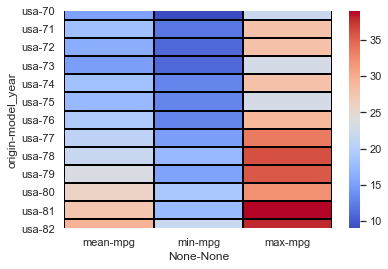

In [30]:
mpg_mean = mpg.pivot_table(index=['origin', 'model_year'], values='mpg', aggfunc=[np.mean, min, max])
mpg_usa = mpg_mean.query('origin == ["usa"]')
sns.heatmap(mpg_usa,cmap='coolwarm', linecolor='black', linewidths=1)

<div class="alert alert-info">
  <strong>Info!</strong> You may notice the top and bottom boxes being cut off in your heatmaps. This is due to a matplotlib bug that is resolved by updating to version 3.1.2. I was not able to do the update due to conflicting library versions. Your Mileage May Vary.
</div>

<div class="alert alert-block alert-success">
<b>Installation - Upgrade for matplotlib::</b> <br>
    conda install -c conda-forge matplotlib=3.1.2    
</div>

Let's grab the data from last week's heart study and do some graphing!

<div class="alert alert-block alert-success">
<b>Installation - pandas_summary::</b> <br>
    pip install pandas-summary   
</div>

In [32]:
pip install pandas-summary

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from pandas_summary import DataFrameSummary

In [46]:
heart_df = pd.read_csv('C:/Users/eltac/Downloads//heart_disease_formatted.csv')

In [47]:
dfs = DataFrameSummary(heart_df)

In [48]:
dfs.columns_stats

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,smoke,...,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,random,num
counts,617,617,617,617,617,617,617,617,617,617,...,617,617,617,617,617,617,617,617,617,617
uniques,50,2,2,2,2,4,52,2,182,2,...,2,2,2,2,2,2,2,2,617,5
missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,bool,bool,bool,numeric,numeric,bool,numeric,bool,...,bool,bool,bool,bool,bool,bool,bool,bool,numeric,numeric


Let's also get that ranking data so we can focus on fewer columns.

In [55]:
with open ('C:/Users/eltac/Downloads/feature_rank.csv') as infile:
    feature_ranks = [line.strip() for line in infile]

In [56]:
top_ranks = feature_ranks[:10]
top_ranks

['ladprox,0.06324900526793167',
 '',
 'rcaprox,0.06271372004702375',
 '',
 'cxmain,0.059559186939175245',
 '',
 'lmt,0.04229048532022625',
 '',
 'laddist,0.041349131639633774',
 '']

In [62]:
while("" in top_ranks) : 
    top_ranks.remove('')

In [63]:
top_ranks

['ladprox,0.06324900526793167',
 'rcaprox,0.06271372004702375',
 'cxmain,0.059559186939175245',
 'lmt,0.04229048532022625',
 'laddist,0.041349131639633774']

Let's create a dataset with only those columns plus the target column, 'num'.

In [64]:
top_rank_cols = [rank.split(',')[0] for rank in top_ranks]
top_rank_cols.append('num')
top_rank_cols

['ladprox', 'rcaprox', 'cxmain', 'lmt', 'laddist', 'num']

**Note:** The subsetting technique below produces a copy of the columns that is unrelated to the original. Any changes made to the data here will NOT propagate back to the original `heart_df` dataframe.

In [65]:
top_rank_df = heart_df[top_rank_cols].copy()

Let's look at a pairplot first.

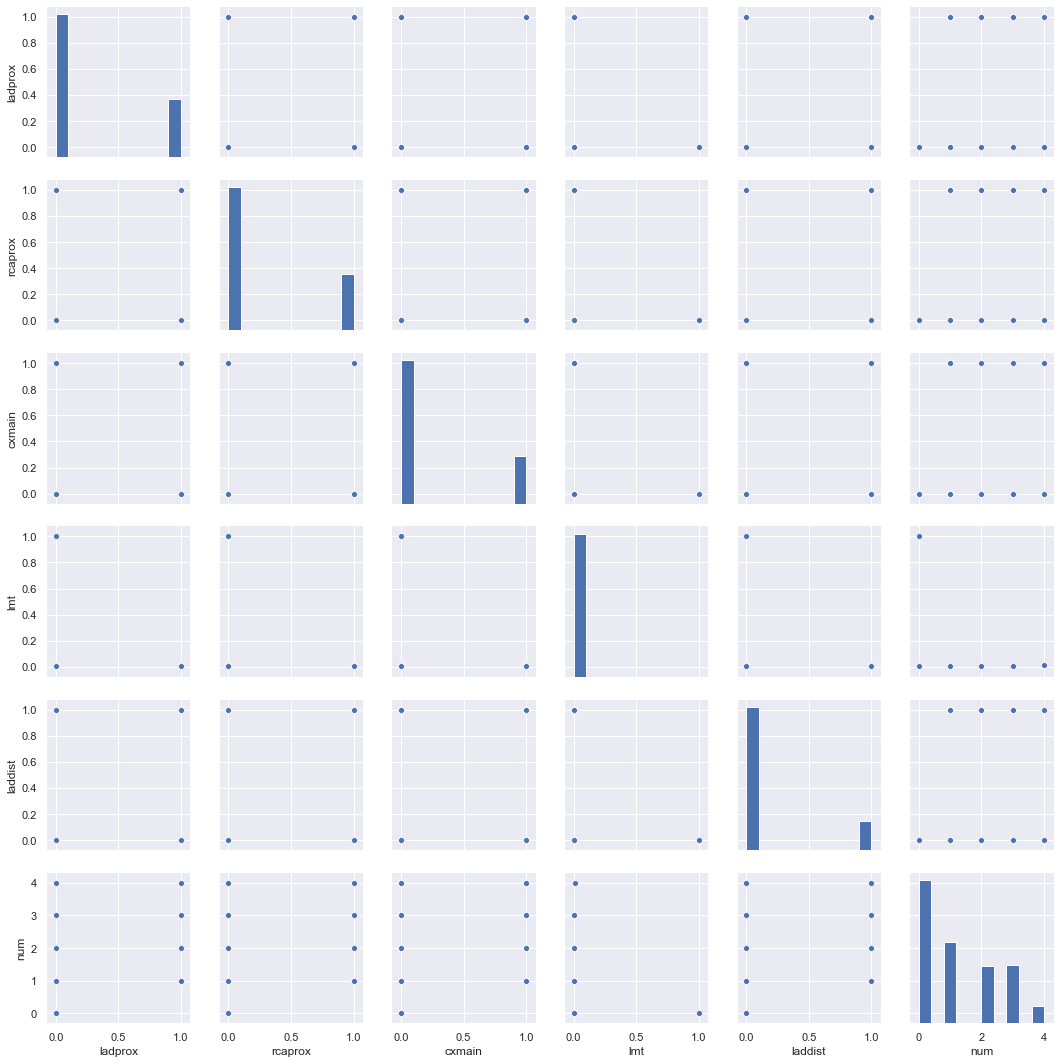

In [66]:
sns.pairplot(data=top_rank_df)

Well, that wasn't too revealing. Let's try a correlation matrix and put it in a heatmap.

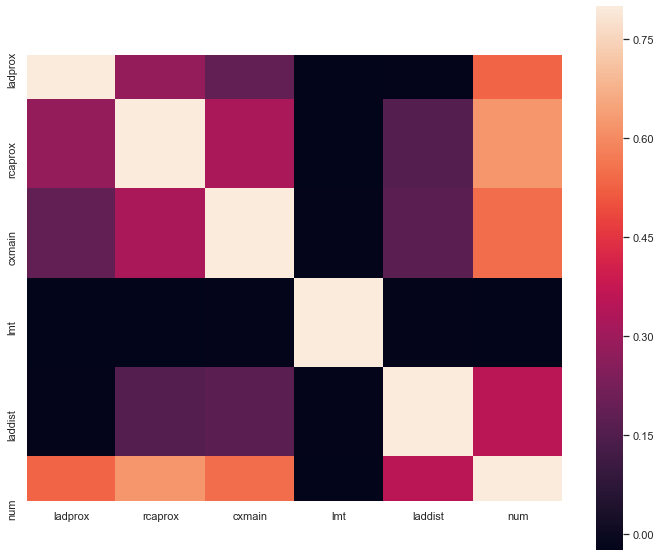

In [67]:
corrmat = top_rank_df.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True)

<function matplotlib.pyplot.show(*args, **kw)>

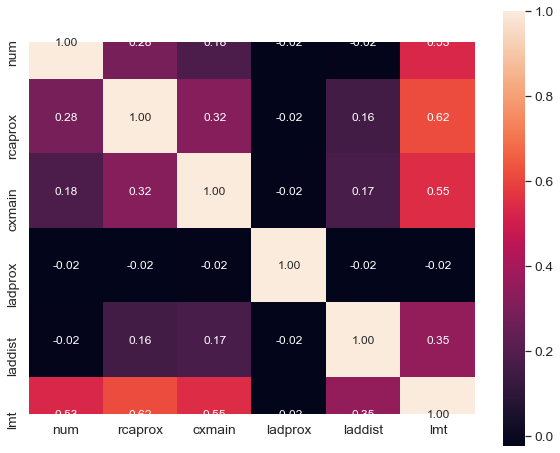

In [68]:
# SalePrice correlation matrix
k = top_rank_df.shape[1] # number of vars for heatmap
cols = corrmat.nlargest(k, 'num')['num'].index

cm = np.corrcoef(top_rank_df.values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12},yticklabels=cols.values, xticklabels=cols.values)
plt.show

It looks like **'proto'** has (relatively) high correlation to **'num'** and **'rcaprox'** has (relatively) high correlation to **'proto'**. It also looks like **'cxmain', 'painexer', 'lmt', 'age' and 'chol'** have some correlation to **'proto'**. Let's explore those. 

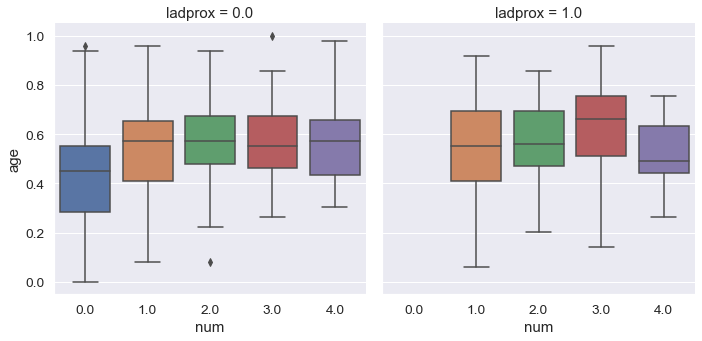

In [47]:
sns.catplot(x = 'num', y='age', col='ladprox', kind='box',data=top_rank_df)

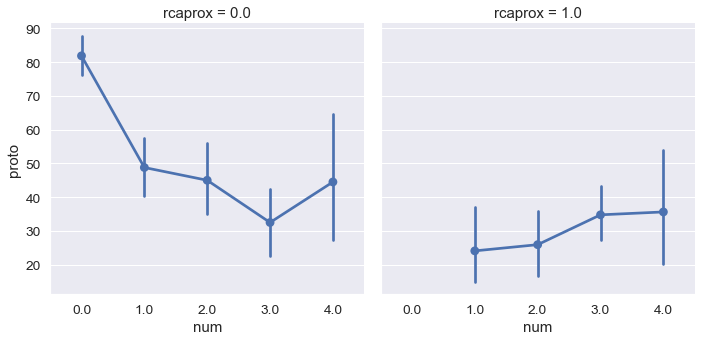

In [48]:
sns.catplot(x = 'num', y='proto', col='rcaprox', kind='point',data=top_rank_df)

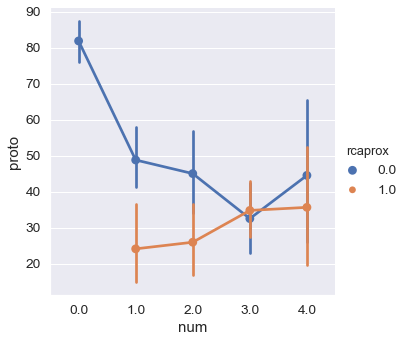

In [49]:
sns.catplot(x = 'num', y='proto', hue='rcaprox', kind='point',data=top_rank_df)

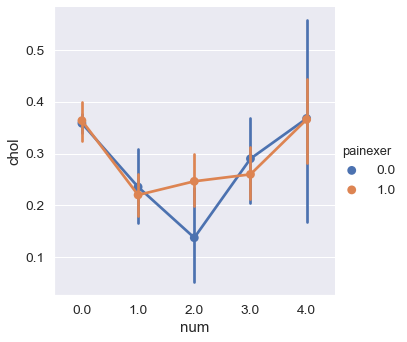

In [50]:
sns.catplot(x = 'num', y='chol', hue='painexer',kind='point',data=top_rank_df)

As you may notice, **catplot** is built on **FacetGrid**. A FacetGrid can have _up to_ three dimensions: **row, col,** and **hue.** The FacetGrid takes in the dataset and values for row, col, and hue.

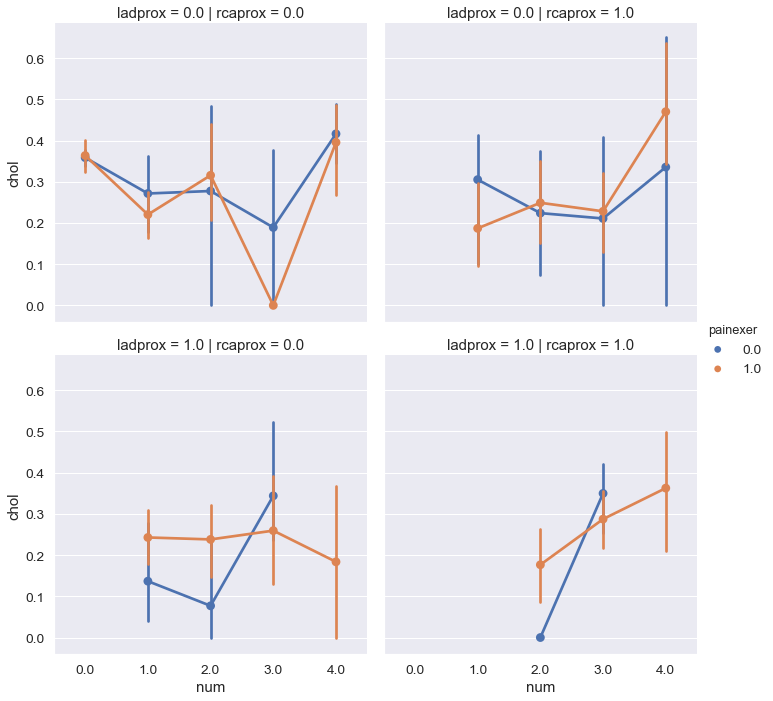

In [51]:
sns.catplot(x = "num", y='chol', col='rcaprox', row='ladprox', hue='painexer',kind='point',data=top_rank_df)

***

## Altair 

The Altair library is my new favorite for visualization. Unfortunately, it is still relatively new and not as popular as Matplotlib and Seaborn, so I present it last.

**Altair calls itself:** 
>a declarative statistical visualization library for Python

The main contributor is Jake Vanderplas:

* Astrophysicist -- processes and graphs **a lot** of data.
* Author of "Python Data Science Handbook" 
    * 100% online book, written in Jupyter notebooks, open source
    * https://jakevdp.github.io/PythonDataScienceHandbook/ 
* Pycon 2017 keynote speaker: youtube.com/watch?v=ZyjCqQEUa8o

Online documentation: 

* Installation: https://altair-viz.github.io/getting_started/installation.html
* Basic usage: https://altair-viz.github.io/getting_started/starting.html

<div class="alert alert-block alert-success">
<b>Installation - Altair::</b> <br>
    conda install -c conda-forge altair vega_datasets jupyterlab   
</div>

In [34]:
    conda install -c conda-forge altair vega_datasets jupyterlab   


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\eltac\Anaconda3

  added / updated specs:
    - altair
    - jupyterlab
    - vega_datasets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.3.0               |           py37_0         755 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    vega_datasets-0.7.0        |             py_0         176 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  altair             conda-forge/win-64::altair-3.3.0-py37_0
  vega_datasets      conda-forge/noarch::vega_datasets-0.7.0-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/

In [37]:
import altair as alt

### Tidy Data

Altair is built around the DataFrame and **tidy** data.

>The idea of "Tidy Data" comes from RStudio developer Hadley Wickham in an article by the same name, published in 2014 by the Journal of Statistical Software. Wickham defined a "framework" set of 3 characteristics that all "tidy," or easily analyzable, data share (Tidy Data, Section 2.3): 
>
>1. Each variable forms a column.
>2. Each observation forms a row.
>3. Each type of observational unit forms a table.
>
>Wickham makes the observation that his three rules correspond to Edgar F. Codd's **3rd Normal Form (3NF)** that forms the backbone of relational database design (Wickham, 2014). 

### Chart objects - Marks and Encoding
Altair's main object is the `Chart` object, which takes a dataframe as an argument.

In [38]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [39]:
chart = alt.Chart(data)

Charts need to have `mark`s -- points, lines, bars, etc., and the data for the marks is `encode`ed.

Notice that the `chart = ` line above didn't really do anything. Let's add some marks and encoding.

In [40]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='b'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Unfortunately, our data is a little more complex. Altair is able to read the Pandas datatype, but in our case we never told Pandas that our `num` column (for example) is categorical, so Altair doesn't know what to do with it. Fortunately, we have some help.

**Encoding shorthand:**

* O for ordinal
* Q for quantitative
* N for nominal
* T for temporal

In [41]:
alt.Chart(top_rank_df).mark_point().encode(
    x='num:N',
    y='chol:Q'
)

NameError: name 'top_rank_df' is not defined

Hmmm... OK. Let's play with color a bit. 

In [59]:
alt.Chart(top_rank_df).mark_point().encode(
    x='age:Q',
    y='chol:Q',
    color='num:N'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Let's try something else. How about a good, old-fashioned bar graph. Simple! Just change the mark type!

In [60]:
alt.Chart(top_rank_df).mark_bar().encode(
    x='num:O',
    y='proto:Q'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [61]:
alt.Chart(top_rank_df).mark_line().encode(
    x='num:O',
    y='proto:O'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Aggregation

Altair has aggregation functions like **average**, **min**, **max**, etc. for the x and y axes. 

In [62]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [63]:
alt.Chart(mpg).mark_bar().encode(
    x='model_year:O',
    y='average(mpg):Q'
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Compound Charts - Layering, HConcat and VConcat

Want a few together on one line? That gets a bit more complex, but let's see if we can muddle our way through.

In this case, we create a variable to hold our "base" chart, the we call the appropriate function (hconcat below) to add new properties to the base and concatenate that version onto the others.

In [64]:
base = alt.Chart(mpg).mark_bar().encode(
    x='model_year:O',
    y='average(mpg):Q'
)

alt.hconcat(
    base.encode(color='cylinders:Q').properties(title='Cylinders'),
    base.encode(color='displacement:Q').properties(title='displacement'),
    base.encode(color='horsepower:Q').properties(title='horsepower')
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


This is really only the beginning of what Altair can do. I encourage you to read through the documentation and try some of the more advanced charts. 

## Bonus -- Creating A Dashboard with Altair and Panel

See notebook "Artist_Dashboard_Demo.ipynb"